In [22]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# from IPython.display import Image
import mplhep as hep
hep.style.use('ATLAS')
import os
from tqdm import tqdm
import h5py
import pandas

### 读取实验数据

In [2]:
def read_pion_spectra_data(file_path, centrality, particle_type):
    """
    读取d+Au碰撞的pion spectra数据，根据中心度和粒子类型选择
    
    参数:
        file_path: 文件路径
        centrality: 中心度范围，如"0-20%", "20-40%", "40-60%", "60-88%", "0-100%"
        particle_type: 粒子类型，如"π+", "π-"
    
    返回:
        DataFrame包含列:
        pT, pT_low, pT_high, Yields, stat_plus, stat_minus, sys_plus, sys_minus
    """
    # 定义不同数据块的行号范围
    data_blocks = {
        "0-20%":  {"pion/proton-": (8,   32), "pion/proton+": (143, 167), "kaon-": (8,   29), "kaon+": (128, 148)},
        "20-40%": {"pion/proton-": (62,  86), "pion/proton+": (196, 220), "kaon-": (56,  77), "kaon+": (176, 197)},
        "40-60%": {"pion/proton-": (89, 113), "pion/proton+": (223, 247), "kaon-": (80, 101), "kaon+": (200, 221)},
        "60-88%": {"pion/proton-": (116,140), "pion/proton+": (250, 274), "kaon-": (104,125), "kaon+": (224, 245)},
        "0-100%": {"pion/proton-": (35,  59), "pion/proton+": (169, 193), "kaon-": (32,  53), "kaon+": (152, 173)},
    }
    
    # 获取对应的行号范围
    try:
        start_row, end_row = data_blocks[centrality][particle_type]
    except KeyError:
        raise ValueError(f"无效的中心度或粒子类型。可用选项: 中心度{list(data_blocks.keys())}, 粒子类型{['+', '-']}")
    
    # 读取数据
    df = pd.read_csv(
        file_path,
        skiprows=start_row,
        nrows=end_row - start_row,
        header=None
    )
    
    # 列命名
    df.columns = [
        'pT', 'pT_low', 'pT_high', 'Yields', 
        'stat_plus', 'stat_minus', 'sys_plus', 'sys_minus'
    ]
    
    # 数据清洗
    df = df.dropna()
    df = df.apply(pd.to_numeric, errors='coerce')
    
    return df



In [3]:
pion_file_path = './data/HEPData_dAu_spectra_pion.csv'
pion_plus_0_20 = read_pion_spectra_data(pion_file_path, "0-20%", "pion/proton+")
pion_plus_20_40 = read_pion_spectra_data(pion_file_path, "20-40%", "pion/proton+")
pion_plus_40_60 = read_pion_spectra_data(pion_file_path, "40-60%", "pion/proton+")
pion_plus_60_88 = read_pion_spectra_data(pion_file_path, "60-88%", "pion/proton+")
pion_plus_0_100 = read_pion_spectra_data(pion_file_path, "0-100%", "pion/proton+")

In [4]:
proton_file_path = './data/HEPData_dAu_spectra_proton.csv'
proton_plus_0_20 = read_pion_spectra_data(proton_file_path, "0-20%", "pion/proton+")
proton_plus_20_40 = read_pion_spectra_data(proton_file_path, "20-40%", "pion/proton+")
proton_plus_40_60 = read_pion_spectra_data(proton_file_path, "40-60%", "pion/proton+")
proton_plus_60_88 = read_pion_spectra_data(proton_file_path, "60-88%", "pion/proton+")
proton_plus_0_100 = read_pion_spectra_data(proton_file_path, "0-100%", "pion/proton+")

In [5]:
kaon_file_path = './data/HEPData_dAu_spectra_kaon.csv'
kaon_plus_0_20 = read_pion_spectra_data(kaon_file_path, "0-20%", "kaon+")
kaon_plus_20_40 = read_pion_spectra_data(kaon_file_path, "20-40%", "kaon+")
kaon_plus_40_60 = read_pion_spectra_data(kaon_file_path, "40-60%", "kaon+")
kaon_plus_60_88 = read_pion_spectra_data(kaon_file_path, "60-88%", "kaon+")
kaon_plus_0_100 = read_pion_spectra_data(kaon_file_path, "0-100%", "kaon+")

In [6]:
pion_plus_0_20

,pT,pT_low,pT_high,Yields,stat_plus,stat_minus,sys_plus,sys_minus
0,0.55,0.5,0.6,1.538340,0.020451,-0.020451,0.123067,-0.123067
1,0.65,0.6,0.7,0.997427,0.012528,-0.012528,0.079794,-0.079794
2,0.75,0.7,0.8,0.657201,0.008032,-0.008032,0.052576,-0.052576
3,0.85,0.8,0.9,0.432589,0.005129,-0.005129,0.034607,-0.034607
4,0.95,0.9,1.0,0.281464,0.003296,-0.003296,0.022517,-0.022517
5,1.05,1.0,1.1,0.192231,0.002238,-0.002238,0.015378,-0.015378
6,1.15,1.1,1.2,0.133400,0.001575,-0.001575,0.010672,-0.010672
7,1.25,1.2,1.3,0.094917,0.001134,-0.001134,0.007593,-0.007593
8,1.35,1.3,1.4,0.066837,0.000800,-0.000800,0.005347,-0.005347
9,1.45,1.4,1.5,0.046932,0.000559,-0.000559,0.003755,-0.003755


### 读取模式数据

In [36]:
# # Load
with h5py.File('./data/pt_spectra/pT_spectra_211_Tfrz_180Mev_ETAOS_0p16_yCut_tau0p6.h5', 'r') as f:
    pT_spectra_211_Tfrz_180Mev_ETAOS_0p16_yCut_tau0p6 = {key: f[key][()] for key in f.keys()}

with h5py.File('./data/pt_spectra/pT_spectra_2212_Tfrz_180Mev_ETAOS_0p16_yCut_tau0p6.h5', 'r') as f:
    pT_spectra_2212_Tfrz_180Mev_ETAOS_0p16_yCut_tau0p6 = {key: f[key][()] for key in f.keys()}

with h5py.File('./data/pt_spectra/pT_spectra_321_Tfrz_180Mev_ETAOS_0p16_yCut_tau0p6.h5', 'r') as f:
    pT_spectra_321_Tfrz_180Mev_ETAOS_0p16_yCut_tau0p6 = {key: f[key][()] for key in f.keys()}
    

    
# # Load
with h5py.File('./data/pt_spectra/pT_spectra_211_Tfrz_180Mev_ETAOS_0p16_EtaCut_tau0p6.h5', 'r') as f:
    pT_spectra_211_Tfrz_180Mev_ETAOS_0p16_EtaCut_tau0p6 = {key: f[key][()] for key in f.keys()}

with h5py.File('./data/pt_spectra/pT_spectra_2212_Tfrz_180Mev_ETAOS_0p16_EtaCut_tau0p6.h5', 'r') as f:
    pT_spectra_2212_Tfrz_180Mev_ETAOS_0p16_EtaCut_tau0p6 = {key: f[key][()] for key in f.keys()}

with h5py.File('./data/pt_spectra/pT_spectra_321_Tfrz_180Mev_ETAOS_0p16_EtaCut_tau0p6.h5', 'r') as f:
    pT_spectra_321_Tfrz_180Mev_ETAOS_0p16_EtaCut_tau0p6 = {key: f[key][()] for key in f.keys()}

    
# # Load
with h5py.File('./data/pt_spectra/pT_spectra_211_Tfrz_150Mev_ETAOS_0p16_EtaCut_tau0p6.h5', 'r') as f:
    pT_spectra_211_Tfrz_150Mev_ETAOS_0p16_EtaCut_tau0p6 = {key: f[key][()] for key in f.keys()}

with h5py.File('./data/pt_spectra/pT_spectra_2212_Tfrz_150Mev_ETAOS_0p16_EtaCut_tau0p6.h5', 'r') as f:
    pT_spectra_2212_Tfrz_150Mev_ETAOS_0p16_EtaCut_tau0p6 = {key: f[key][()] for key in f.keys()}

with h5py.File('./data/pt_spectra/pT_spectra_321_Tfrz_150Mev_ETAOS_0p16_EtaCut_tau0p6.h5', 'r') as f:
    pT_spectra_321_Tfrz_150Mev_ETAOS_0p16_EtaCut_tau0p6 = {key: f[key][()] for key in f.keys()}

### 画实验模拟的对比

In [37]:
def plot_combined_centralities_pT_spectra(pid=211, nsampls=2000, pt_bins=20, pt_range=(0,3),
                                        centralities=["0_20", "20_40", "40_60"], ylog=True,
                                        ETAOS ='180_yCut',Tfrz=180, scale_factors=None):
    """
    绘制多个中心度的pT谱图
    
    参数:
        pid : 粒子ID (211:π⁺, 2212:p, 321:K⁺)
        centralities : 要绘制中心度列表，如["0_20", "20_40", "40_60"]
        ylog : 是否使用对数y轴
        scale_factors : 各中心度的缩放倍数字典，如{"0_20": 1.0, "20_40": 0.5}
    """
    # 根据PID映射到对应的实验数据
    data_mapping = {
        211: {  # π⁺
            "0_20": pion_plus_0_20,
            "20_40": pion_plus_20_40,
            "40_60": pion_plus_40_60,
            "60_88": pion_plus_60_88,
            "0_100": pion_plus_0_100
        },
        2212: {  # p
            "0_20": proton_plus_0_20,
            "20_40": proton_plus_20_40,
            "40_60": proton_plus_40_60,
            "60_88": proton_plus_60_88,
            "0_100": proton_plus_0_100
        },
        321: {  # K⁺
            "0_20": kaon_plus_0_20,
            "20_40": kaon_plus_20_40,
            "40_60": kaon_plus_40_60,
            "60_88": kaon_plus_60_88,
            "0_100": kaon_plus_0_100
        }
    }
    
    # 模拟结果映射
    if ETAOS =='180_EtaCut':
        sim_mapping = {
            211: pT_spectra_211_Tfrz_180Mev_ETAOS_0p16_EtaCut_tau0p6,
            2212: pT_spectra_2212_Tfrz_180Mev_ETAOS_0p16_EtaCut_tau0p6,
            321: pT_spectra_321_Tfrz_180Mev_ETAOS_0p16_EtaCut_tau0p6
        }
        
    elif ETAOS =='150_EtaCut':
        sim_mapping = {
            211: pT_spectra_211_Tfrz_150Mev_ETAOS_0p16_EtaCut_tau0p6,
            2212: pT_spectra_2212_Tfrz_150Mev_ETAOS_0p16_EtaCut_tau0p6,
            321: pT_spectra_321_Tfrz_150Mev_ETAOS_0p16_EtaCut_tau0p6
        }

    elif ETAOS =='180_yCut':
        sim_mapping = {
            211: pT_spectra_211_Tfrz_180Mev_ETAOS_0p16_yCut_tau0p6,
            2212: pT_spectra_2212_Tfrz_180Mev_ETAOS_0p16_yCut_tau0p6,
            321: pT_spectra_321_Tfrz_180Mev_ETAOS_0p16_yCut_tau0p6
        }
    
    # 粒子信息
    particle_info = {
        211: {'symbol': r'\pi^+', 'name': 'pion'},
        2212: {'symbol': 'p^+', 'name': 'proton'},
        321: {'symbol': 'K^+', 'name': 'kaon'}
    }
    particle = particle_info.get(pid, {'symbol': f'PID{pid}', 'name': f'PID{pid}'})
    
    # 默认缩放倍数(不缩放)
    if scale_factors is None:
        scale_factors = {cent: 1.0 for cent in centralities}
    
    # 创建图形
    plt.figure(figsize=(8, 6))
    
    # 定义颜色和线型
    colors = ['r', 'g', 'b', 'm', 'c']
    line_styles = ['-', '--', ':', '-.', '-']
    mark_styles = ['s', 'o', '^', 'D', 'v']  # 方形、圆形、三角形、菱形、倒三角形
    
    # 遍历每个中心度
    for idx, cent in enumerate(centralities):
        # 获取实验数据
        data_exp = data_mapping[pid][cent]
        
        # 获取模拟数据并过滤范围
        sim_data = sim_mapping[pid][cent]
        mask = (sim_data[:, 0] >= pt_range[0]) & (sim_data[:, 0] <= pt_range[1])
        filtered_data = sim_data[mask]
        
        # 获取当前中心度的缩放倍数
        scale = scale_factors.get(cent, 1.0)
        
        # 解析中心度范围
        m, n = map(int, cent.split('_'))
        
        # 绘制模拟结果(应用缩放)
        plt.plot(filtered_data[:, 0], filtered_data[:, 1] * scale, 
                f'{colors[idx]}{line_styles[idx]}', 
                markersize=5, linewidth=1.5, 
                label=f'{m}-{n}% CLVisc ×{scale:.1f}' if scale != 1.0 else f'{m}-{n}% CLVisc')
        

        # 计算总误差 = sqrt(统计误差² + 系统误差²)
        exp_data = data_mapping[pid][cent].copy()  # 创建副本避免修改原数据
        exp_data['err_plus'] = (exp_data['stat_plus']**2 + exp_data['sys_plus']**2)**0.5
        exp_data['err_minus'] = (exp_data['stat_minus']**2 + exp_data['sys_minus']**2)**0.5

        # 绘制实验数据(带总误差棒)
        plt.errorbar(
            x=exp_data['pT'],
            y=exp_data['Yields']* scale,
            yerr=[exp_data['err_minus']* scale, exp_data['err_plus']* scale],  # 使用总误差
#             xerr=[exp_data['pT']-exp_data['pT_low'], exp_data['pT_high']-exp_data['pT']],  # pT区间
            fmt=f'{colors[idx]}{mark_styles[idx]}',  # 方形标记
            markersize=5,
            capsize=3,
            capthick=1,
            elinewidth=1,
            label=f'{m}-{n}% PHENIX ×{scale:.1f}' if scale != 1.0 else f'{m}-{n}% PHENIX'
        )


    # 设置坐标轴和标题
#     plt.plot([], [], ' ', label=f'Freeze-out T = {Tfrz} MeV')  # 添加一个空白线条只显示文本
    plt.xlim(0,3)
    plt.xlabel(r'$p_T$ [GeV]', fontsize=20, ha='center')
    plt.ylabel(r'$\rm d^2N/2\pi p_T dp_T dY$ $[Gev^{-2}]$', fontsize=20, ha='center')
#     plt.title(rf'd+Au $\sqrt{{\rm s_{{\rm NN}}}}$=200 GeV for ${particle["symbol"]}$ with $\eta/s$={ETAOS} Mev', fontsize=20)
    plt.title(rf'd+Au $\sqrt{{\rm s_{{\rm NN}}}}$=200 GeV for ${particle["symbol"]}$ with '+ r'$T_{frz}=$'+f'{Tfrz} Mev', fontsize=20)

    
    if ylog:
        plt.yscale('log')
    
    plt.legend(fontsize=16, ncol=1)
    plt.tight_layout()
    plt.show()
    

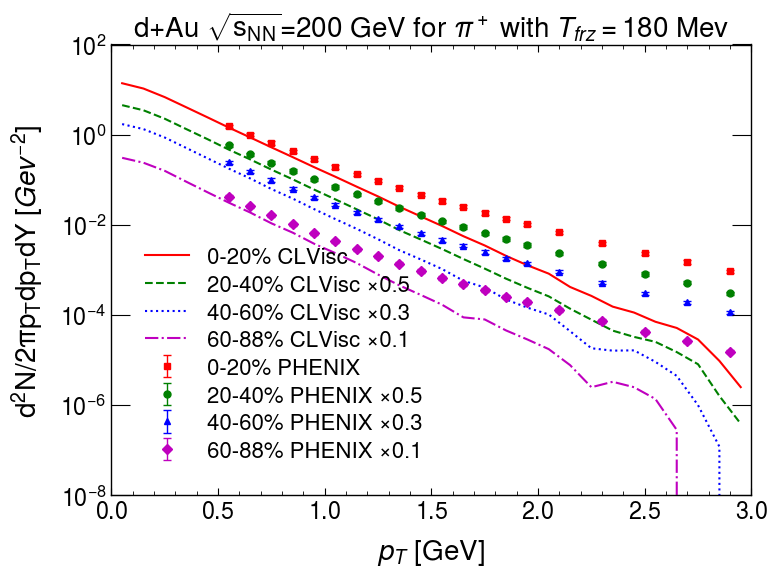

In [38]:
plot_combined_centralities_pT_spectra(pid=211, nsampls=2000, pt_bins=20, pt_range=(0,3),
                                      centralities=["0_20", "20_40", "40_60" , "60_88"], 
                                      ylog=True,ETAOS='180_yCut',
                                      scale_factors={"0_20": 1.0, "20_40": 0.5, "40_60": 0.3, "60_88": 0.1})

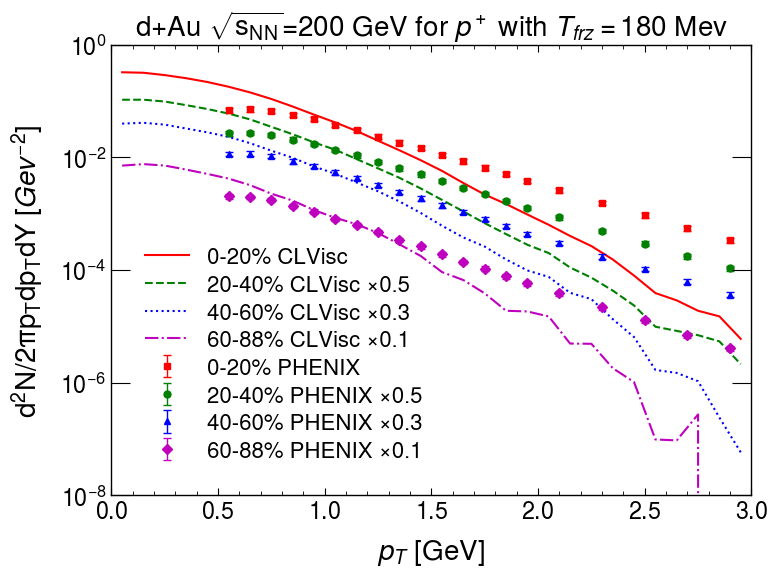

In [39]:
plot_combined_centralities_pT_spectra(pid=2212, nsampls=2000, pt_bins=20, pt_range=(0,3),
                                      centralities=["0_20", "20_40", "40_60" , "60_88"], 
                                      ylog=True,ETAOS='180_yCut',
                                      scale_factors={"0_20": 1.0, "20_40": 0.5, "40_60": 0.3, "60_88": 0.1})

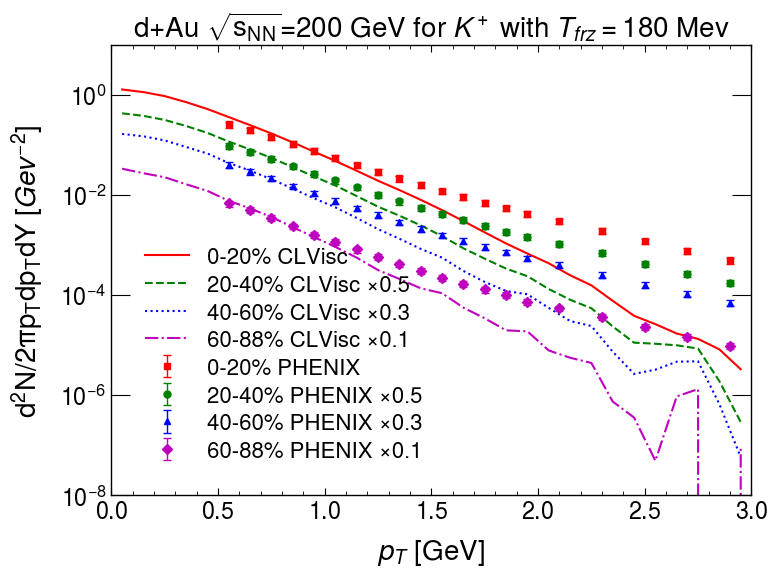

In [40]:
plot_combined_centralities_pT_spectra(pid=321, nsampls=2000, pt_bins=20, pt_range=(0,3),
                                      centralities=["0_20", "20_40", "40_60" , "60_88"], 
                                      ylog=True,ETAOS='180_yCut',
                                      scale_factors={"0_20": 1.0, "20_40": 0.5, "40_60": 0.3, "60_88": 0.1})

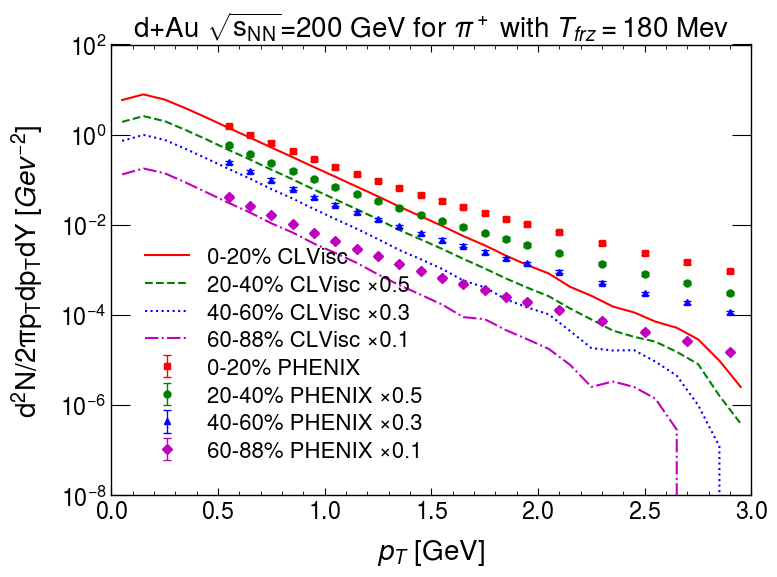

In [41]:
plot_combined_centralities_pT_spectra(pid=211, nsampls=2000, pt_bins=20, pt_range=(0,3),
                                      centralities=["0_20", "20_40", "40_60" , "60_88"], 
                                      ylog=True,ETAOS='180_EtaCut',Tfrz=180, 
                                      scale_factors={"0_20": 1.0, "20_40": 0.5, "40_60": 0.3, "60_88": 0.1})

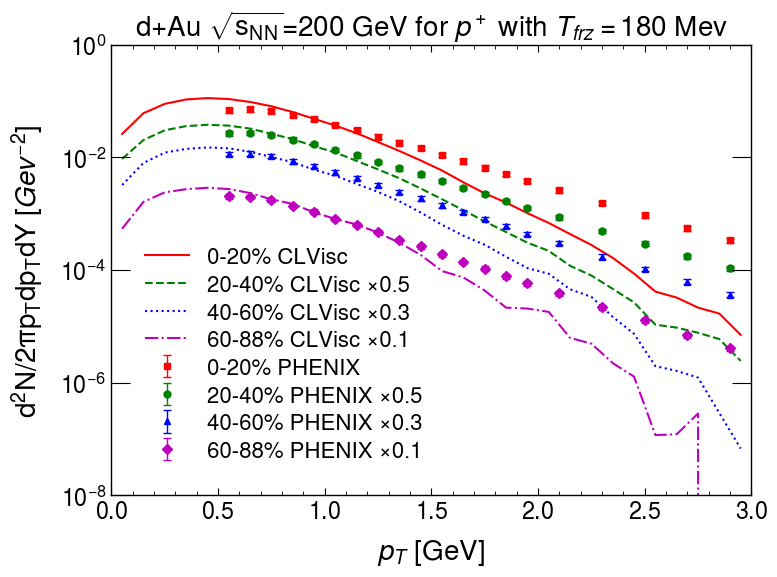

In [42]:
plot_combined_centralities_pT_spectra(pid=2212, nsampls=2000, pt_bins=20, pt_range=(0,3),
                                      centralities=["0_20", "20_40", "40_60" , "60_88"], 
                                      ylog=True,ETAOS='180_EtaCut',
                                      scale_factors={"0_20": 1.0, "20_40": 0.5, "40_60": 0.3, "60_88": 0.1})

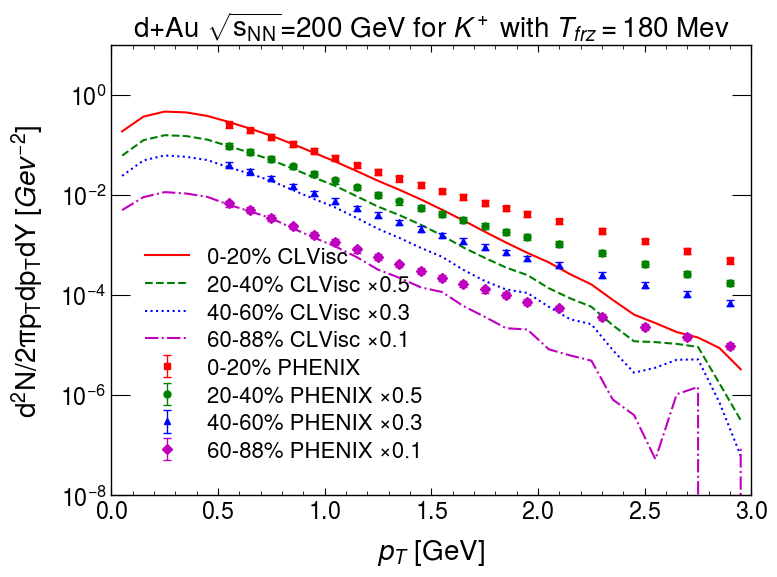

In [43]:
plot_combined_centralities_pT_spectra(pid=321, nsampls=2000, pt_bins=20, pt_range=(0,3),
                                      centralities=["0_20", "20_40", "40_60" , "60_88"], 
                                      ylog=True,ETAOS='180_EtaCut',
                                      scale_factors={"0_20": 1.0, "20_40": 0.5, "40_60": 0.3, "60_88": 0.1})

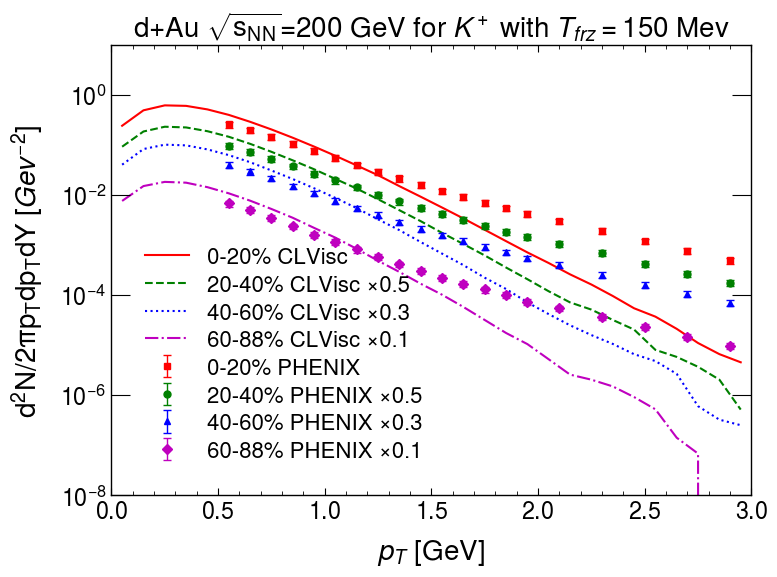

In [44]:
plot_combined_centralities_pT_spectra(pid=321, nsampls=2000, pt_bins=20, pt_range=(0,3),
                                      centralities=["0_20", "20_40", "40_60" , "60_88"], 
                                      ylog=True,ETAOS='150_EtaCut',Tfrz=150,
                                      scale_factors={"0_20": 1.0, "20_40": 0.5, "40_60": 0.3, "60_88": 0.1})

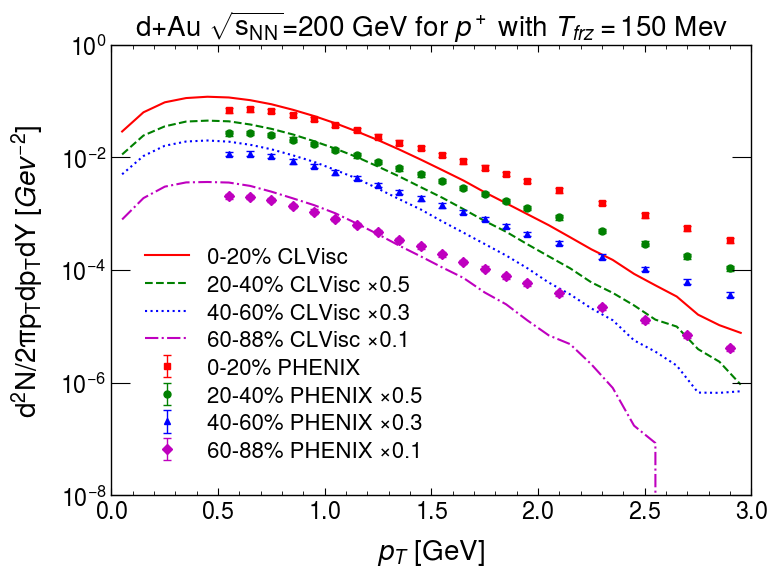

In [45]:
plot_combined_centralities_pT_spectra(pid=2212, nsampls=2000, pt_bins=20, pt_range=(0,3),
                                      centralities=["0_20", "20_40", "40_60" , "60_88"], 
                                      ylog=True,ETAOS='150_EtaCut',Tfrz=150,
                                      scale_factors={"0_20": 1.0, "20_40": 0.5, "40_60": 0.3, "60_88": 0.1})

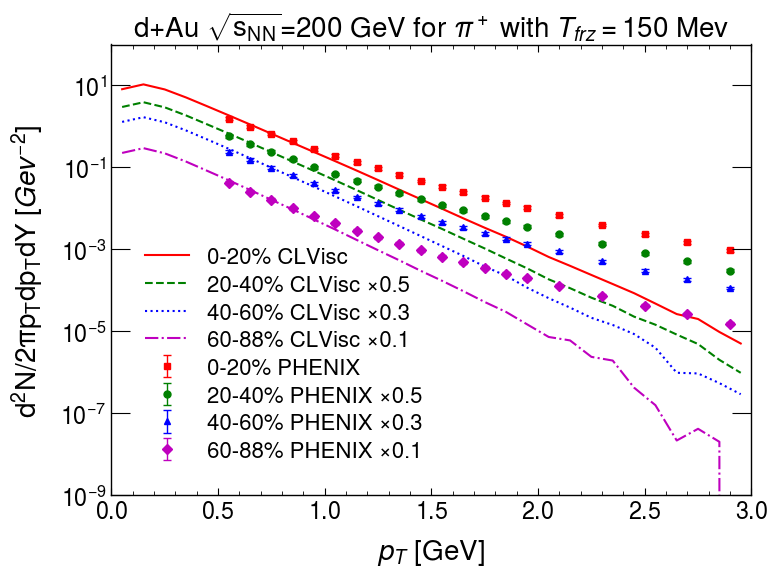

In [46]:
plot_combined_centralities_pT_spectra(pid=211, nsampls=2000, pt_bins=20, pt_range=(0,3),
                                      centralities=["0_20", "20_40", "40_60" , "60_88"], 
                                      ylog=True,ETAOS='150_EtaCut',Tfrz=150,
                                      scale_factors={"0_20": 1.0, "20_40": 0.5, "40_60": 0.3, "60_88": 0.1})

### 画同一中心度的不同粒子

In [53]:
def plot_combined_particles_pT_spectra(centrality="0_20", nsampls=2000, pt_bins=20, pt_range=(0,3),
                                      pids=[211, 321, 2212], ylog=True,
                                      ETAOS='180_yCut', Tfrz=180, scale_factors=None):
    """
    绘制同一中心度下不同粒子的pT谱图
    
    参数:
        centrality : 中心度，如"0_20"
        pids : 要绘制的粒子ID列表 (211:π⁺, 2212:p, 321:K⁺)
        ylog : 是否使用对数y轴
        scale_factors : 各粒子的缩放倍数字典，如{211: 1.0, 321: 0.5}
    """
    # 根据PID映射到对应的实验数据
    data_mapping = {
        211: {  # π⁺
            "0_20": pion_plus_0_20,
            "20_40": pion_plus_20_40,
            "40_60": pion_plus_40_60,
            "60_88": pion_plus_60_88,
            "0_100": pion_plus_0_100
        },
        2212: {  # p
            "0_20": proton_plus_0_20,
            "20_40": proton_plus_20_40,
            "40_60": proton_plus_40_60,
            "60_88": proton_plus_60_88,
            "0_100": proton_plus_0_100
        },
        321: {  # K⁺
            "0_20": kaon_plus_0_20,
            "20_40": kaon_plus_20_40,
            "40_60": kaon_plus_40_60,
            "60_88": kaon_plus_60_88,
            "0_100": kaon_plus_0_100
        }
    }
    
    # 模拟结果映射
    if ETAOS =='180_EtaCut':
        sim_mapping = {
            211: pT_spectra_211_Tfrz_180Mev_ETAOS_0p16_EtaCut_tau0p6,
            2212: pT_spectra_2212_Tfrz_180Mev_ETAOS_0p16_EtaCut_tau0p6,
            321: pT_spectra_321_Tfrz_180Mev_ETAOS_0p16_EtaCut_tau0p6
        }
    elif ETAOS =='150_EtaCut':
        sim_mapping = {
            211: pT_spectra_211_Tfrz_150Mev_ETAOS_0p16_EtaCut_tau0p6,
            2212: pT_spectra_2212_Tfrz_150Mev_ETAOS_0p16_EtaCut_tau0p6,
            321: pT_spectra_321_Tfrz_150Mev_ETAOS_0p16_EtaCut_tau0p6
        }
    elif ETAOS =='180_yCut':
        sim_mapping = {
            211: pT_spectra_211_Tfrz_180Mev_ETAOS_0p16_yCut_tau0p6,
            2212: pT_spectra_2212_Tfrz_180Mev_ETAOS_0p16_yCut_tau0p6,
            321: pT_spectra_321_Tfrz_180Mev_ETAOS_0p16_yCut_tau0p6
        }
    
    # 粒子信息
    particle_info = {
        211: {'symbol': r'\pi^+', 'name': 'pion', 'color': 'r'},
        2212: {'symbol': 'p', 'name': 'proton', 'color': 'b'},
        321: {'symbol': 'K^+', 'name': 'kaon', 'color': 'g'}
    }
    
    # 默认缩放倍数(不缩放)
    if scale_factors is None:
        scale_factors = {pid: 1.0 for pid in pids}
    
    # 创建图形
    plt.figure(figsize=(8, 6))
    
    # 定义线型和标记样式
#     line_styles = ['-', '--', ':', '-.', '-']
    mark_styles = ['s', 'o', '^', 'D', 'v']  # 方形、圆形、三角形、菱形、倒三角形
    
    # 遍历每个粒子
    for idx, pid in enumerate(pids):
        # 获取粒子信息
        particle = particle_info.get(pid, {'symbol': f'PID{pid}', 'name': f'PID{pid}', 'color': f'C{idx}'})
        
        # 获取实验数据
        data_exp = data_mapping[pid][centrality]
        
        # 获取模拟数据并过滤范围
        sim_data = sim_mapping[pid][centrality]
        mask = (sim_data[:, 0] >= pt_range[0]) & (sim_data[:, 0] <= pt_range[1])
        filtered_data = sim_data[mask]
        
        # 获取当前粒子的缩放倍数
        scale = scale_factors.get(pid, 1.0)
        
        # 解析中心度范围
        m, n = map(int, centrality.split('_'))
        
        # 绘制模拟结果(应用缩放)
        plt.plot(filtered_data[:, 0], filtered_data[:, 1] * scale, 
#                 f'{particle["color"]}{line_styles[idx]}', 
                f'{particle["color"]}-', 
                markersize=5, linewidth=1.5, 
                label=rf'${particle["symbol"]}$ CLVisc ×{scale:.1f}' if scale != 1.0 else rf'${particle["symbol"]}$ CLVisc')
        
        # 计算总误差 = sqrt(统计误差² + 系统误差²)
        exp_data = data_mapping[pid][centrality].copy()  # 创建副本避免修改原数据
        exp_data['err_plus'] = (exp_data['stat_plus']**2 + exp_data['sys_plus']**2)**0.5
        exp_data['err_minus'] = (exp_data['stat_minus']**2 + exp_data['sys_minus']**2)**0.5

        # 绘制实验数据(带总误差棒)
        plt.errorbar(
            x=exp_data['pT'],
            y=exp_data['Yields']* scale,
            yerr=[exp_data['err_minus']* scale, exp_data['err_plus']* scale],  # 使用总误差
            fmt=f'{particle["color"]}{mark_styles[idx]}',  # 方形标记
            markersize=5,
            capsize=3,
            capthick=1,
            elinewidth=1,
            label=rf'${particle["symbol"]}$ PHENIX ×{scale:.1f}' if scale != 1.0 else rf'${particle["symbol"]}$ PHENIX'
        )

    # 设置坐标轴和标题
    plt.xlim(0, 3)
    plt.xlabel(r'$p_T$ [GeV]', fontsize=20, ha='center')
    plt.ylabel(r'$\rm d^2N/2\pi p_T dp_T dY$ $[Gev^{-2}]$', fontsize=20, ha='center')
    plt.title(rf'd+Au $\sqrt{{\rm s_{{\rm NN}}}}$=200 GeV {m}-{n}% centrality with '+ r'$T_{frz}=$'+f'{Tfrz} Mev', fontsize=18)
    
    if ylog:
        plt.yscale('log')
    
    plt.legend(fontsize=16, ncol=1)
    plt.tight_layout()
    plt.show()

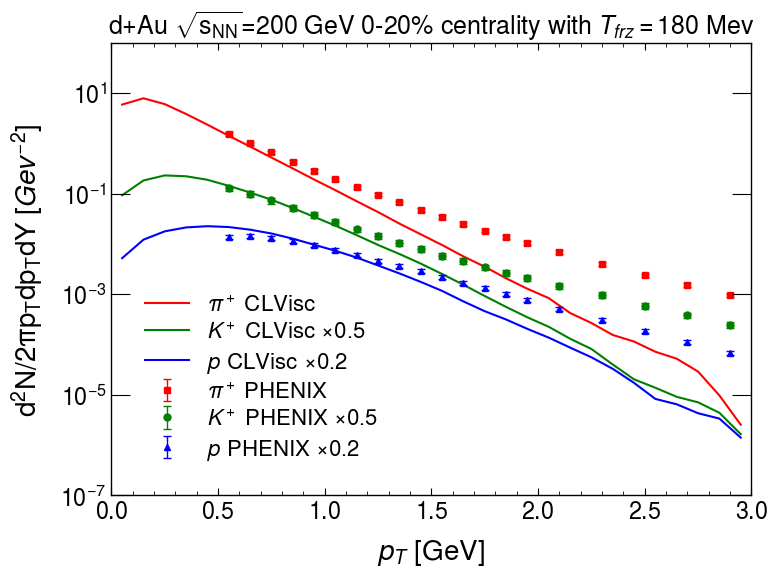

In [55]:
plot_combined_particles_pT_spectra(centrality="0_20", ETAOS='180_EtaCut',Tfrz=180,
                                 pids=[211, 321, 2212],
                                 scale_factors={211:1, 321:0.5, 2212:0.2})

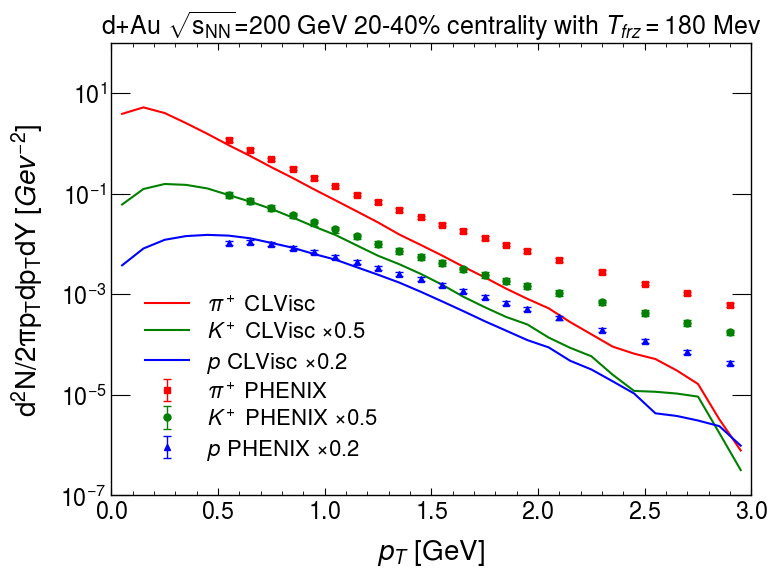

In [59]:
plot_combined_particles_pT_spectra(centrality="20_40", ETAOS='180_EtaCut',Tfrz=180,
                                 pids=[211, 321, 2212],
                                 scale_factors={211:1, 321:0.5, 2212:0.2})

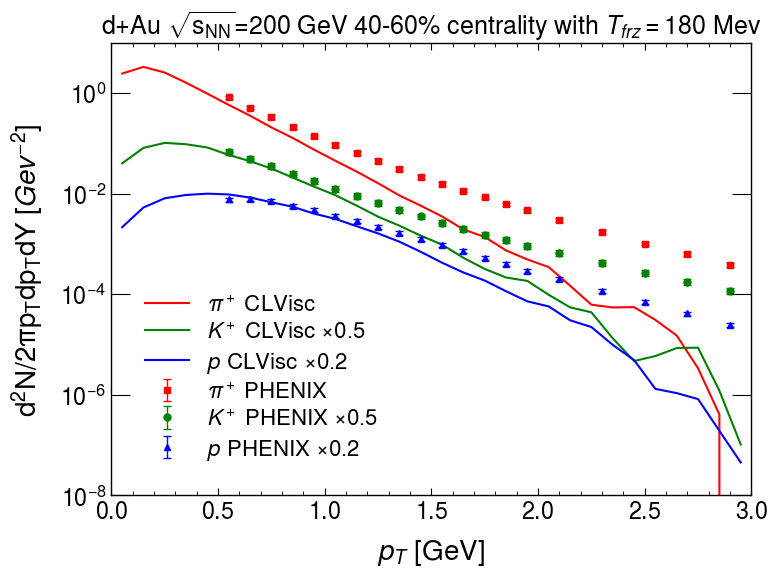

In [60]:
plot_combined_particles_pT_spectra(centrality="40_60", ETAOS='180_EtaCut',Tfrz=180,
                                 pids=[211, 321, 2212],
                                 scale_factors={211:1, 321:0.5, 2212:0.2})

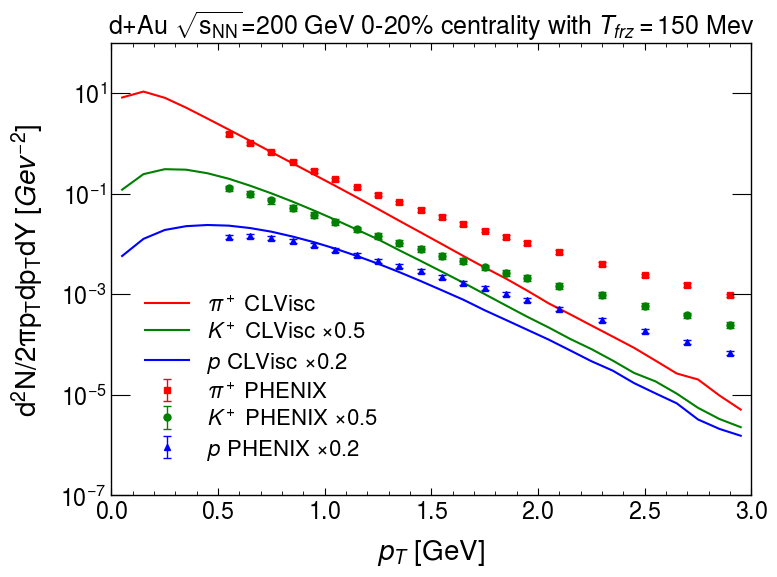

In [61]:
plot_combined_particles_pT_spectra(centrality="0_20", ETAOS='150_EtaCut',Tfrz=150,
                                 pids=[211, 321, 2212],
                                 scale_factors={211:1, 321:0.5, 2212:0.2})

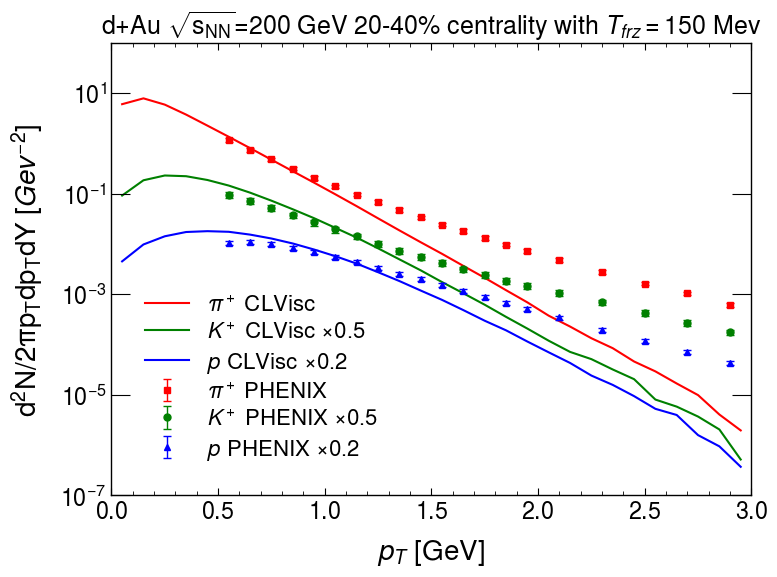

In [62]:
plot_combined_particles_pT_spectra(centrality="20_40", ETAOS='150_EtaCut',Tfrz=150,
                                 pids=[211, 321, 2212],
                                 scale_factors={211:1, 321:0.5, 2212:0.2})

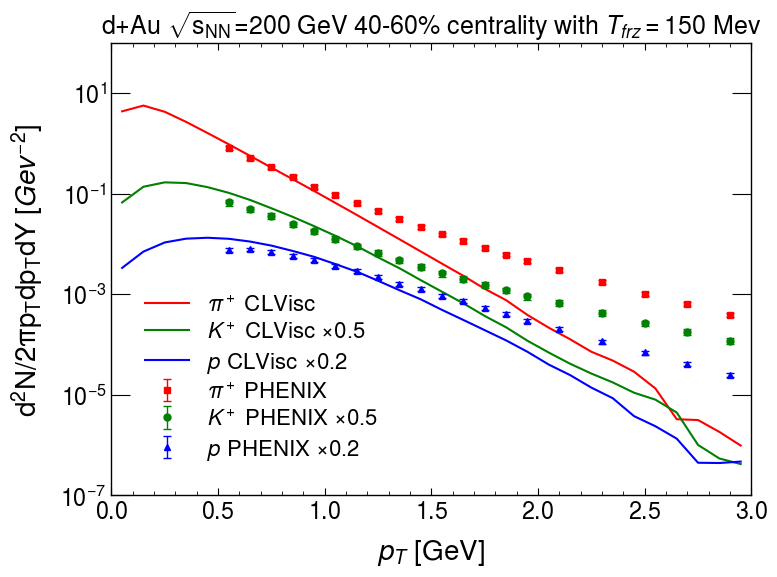

In [63]:
plot_combined_particles_pT_spectra(centrality="40_60", ETAOS='150_EtaCut',Tfrz=150,
                                 pids=[211, 321, 2212],
                                 scale_factors={211:1, 321:0.5, 2212:0.2})

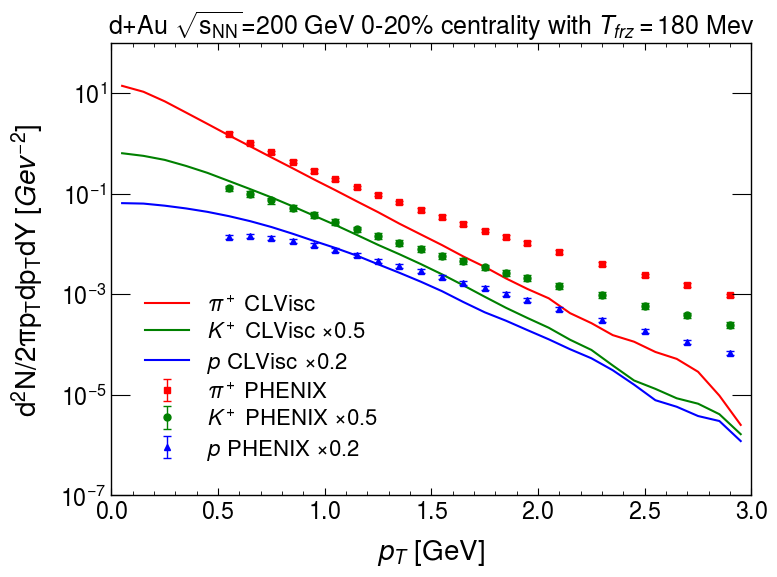

In [57]:
plot_combined_particles_pT_spectra(centrality="0_20", ETAOS='180_yCut',
                                 pids=[211, 321, 2212],
                                 scale_factors={211:1, 321:0.5, 2212:0.2})

### PHOBOS使用 3.0 < | eta | < 5.4  范围划分中心度测量dNdEta。
### PHENIX 2013 使用-3.9  < eta <  -3.0 范围测量pT谱
###  尽管中心度的划分不是完全一致。我们依旧可以用PHINEX的模拟数据看看dNdEta的模拟情况

In [23]:
# 导入实验结果
data_exp0_20 = np.loadtxt('./data/dAu_mult_centrality_Data_200GeVdAu_centrality_0_20.dat')
data_exp20_40 = np.loadtxt('./data/dAu_mult_centrality_Data_200GeVdAu_centrality_20_40.dat')
data_exp40_60 = np.loadtxt('./data/dAu_mult_centrality_Data_200GeVdAu_centrality_40_60.dat')
data_exp60_80 = np.loadtxt('./data/dAu_mult_centrality_Data_200GeVdAu_centrality_60_80.dat')
data_exp80_100 = np.loadtxt('./data/dAu_mult_centrality_Data_200GeVdAu_centrality_80_100.dat')

data_exp = np.array([data_exp0_20,data_exp20_40,data_exp40_60,data_exp60_80,data_exp80_100])


In [64]:
def plot_dNdEta(m=0, n=20, eta_flat='1p0', eta_gw='1p3', event_range=[0, 300],
                para="entropy3D_y0_3p5_sigma_3p0_L_factor_2p5_R_factor_2p5_P_factor_5p0_alpha_1p0_beta_0p5_y_loss_0p0",
                mode_MC_SMOOTH="MC", nsampling=2000, coef=1, fontsize=16, 
                HWF_or_DWF='HWF', color='blue', plot_errbar=False):
    """
    优化后的绘制 dN/dη 图的函数，适用于所有事件数据横坐标相同的情况。
    - 只需对所有事件的纵坐标求平均即可。
    """
#     titletext = 'ebe: ' + convert_label(para)
    

    # 根据模式确定文件路径和文件名
    if mode_MC_SMOOTH == 'MC': # loss n_BC T=150Mev
        input_dir = f"/media/mengzhu/disk2T/d_Au_work/d_Au_{HWF_or_DWF}/d_Au_work_pT_spectra/hydro_result_n_BC/Tfrz_150Mev_ETAOS_0p16_tau0p6/ebe_mc_nsampling_{nsampling}/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
        input_filename = "dNdEta_mc_charged.dat"
    if mode_MC_SMOOTH == 'MC2':# loss n_BC T=180Mev 
        input_dir = f"/media/mengzhu/disk2T/d_Au_work/d_Au_{HWF_or_DWF}/d_Au_work_pT_spectra/hydro_result_n_BC/Tfrz_180Mev_ETAOS_0p16_tau0p6/ebe_mc_nsampling_{nsampling}/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
        input_filename = "dNdEta_mc_charged.dat"
    if mode_MC_SMOOTH == 'MC3':# loss n_BC T=180Mev 
        input_dir = f"/media/mengzhu/disk2T/d_Au_work/d_Au_{HWF_or_DWF}/d_Au_work_pT_spectra/hydro_result_n_BC/Tfrz_128Mev_ETAOS_0p16_tau0p6/ebe_mc_nsampling_{nsampling}/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
        input_filename = "dNdEta_mc_charged.dat"
    
    # 初始化变量
    all_data = []
    event_count = 0

    # 遍历文件并加载数据
    for i in range(event_range[0], event_range[1]):
        input_path = os.path.join(input_dir, f"event{i}", input_filename)
        try:
            dNdEta = np.loadtxt(input_path)
            if len(all_data) == 0:  # 初始化 all_data
                all_data = dNdEta[:, 1]  # 只存储纵坐标
                x_values = dNdEta[:, 0]  # 横坐标（假设所有事件相同）
            else:
                all_data += dNdEta[:, 1]  # 累加纵坐标
            event_count += 1
        except Exception as e:
            print(f"无法处理文件 {input_path}: {e}")

    # 确保有数据可用
    if event_count > 0:
#         print(f"totall events = {event_count}")
        # 计算平均值和标准误差
        bin_means = all_data / event_count  # 平均值
#         std_error = np.sqrt(all_data / event_count) / np.sqrt(event_count)  # 标准误差（假设泊松分布）
        std_error = 1 / np.sqrt(event_count)  # 标准误差（假设泊松分布）
        

        # 绘图
        if plot_errbar:
            plt.errorbar(x_values, coef * bin_means, yerr=coef * std_error*bin_means, fmt='-', color=color)
        else:
            plt.plot(x_values, coef * bin_means, color=color)

        plt.xlabel(r"$\rm \eta$", fontsize=fontsize, ha='center')
        plt.ylabel(r"$\rm dN/d\eta$", fontsize=fontsize, ha='center')
#         plt.title(titletext, fontsize=fontsize)
        plt.xlim(-8, 8)
#         plt.grid(True)
#         plt.show()
    else:
        print("没有找到可处理的文件。")


In [68]:
def plot_hydro_all_mark(
    eta_flat='1p3',eta_gw='1p3',
    para="entropy3D_y0_3p5_sigma_3p0_L_factor_2p5_R_factor_2p5_P_factor_5p0_alpha_1p0_beta_0p5_y_loss_0p0",
    mode='SMOOTH', nsampling=2000, event_range=[0,300],plot_errbar=False,label_para="para 1",
    HWF_or_DWF='HWF',coef=1,fontsize=16, save_fig=False):
    
    # 用P_factor 、beta命名文件
    parts = para.split('_')
    if len(parts)==21:
        P_factor = parts[13] # 第13部分是 P_factor 的值
        beta = parts[17]     # 第17部分是 beta 的值
        delta_eta = parts[20]     # 第17部分是 delta_eta 的值
    elif len(parts)==18:
        P_factor = parts[13] # 第13部分是 P_factor 的值
        beta = parts[17]     # 第17部分是 beta 的值
        delta_eta = 'n_BC'     # 第17部分是 delta_eta 的值
    
    # 颜色列表，用于每个中心度的线条和散点保持一致
    colors = ['red','blue', 'green', 'orange', 'black', 'purple', 'cyan']
    labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
    markers = ['o', '^', 'v', '*','s', 'D']

    # 绘图
#     for idx, m in enumerate([0, 20, 40]):
    for idx, m in enumerate([0]):

        # 绘制不同中心度范围的模拟数据，并确保颜色一致
        plot_dNdEta(m=m, n=m+20, para=para, eta_flat=eta_flat,eta_gw=eta_gw,HWF_or_DWF=HWF_or_DWF, 
                    event_range=event_range,nsampling=nsampling,plot_errbar=plot_errbar,
                    mode_MC_SMOOTH=mode, coef=coef,fontsize=fontsize, color=colors[idx])
        # 绘制实验结果，确保颜色与模拟数据一致
        plt.errorbar(data_exp[idx][:, 0], data_exp[idx][:, 2], yerr=[data_exp[idx][:, 4], data_exp[idx][:, 3]], 
                     fmt=markers[idx], ecolor=colors[idx], color=colors[idx], alpha=0.5, label=labels[idx])
        plt.legend(fontsize=fontsize)

    # 添加标识
    plt.text(0.05, 0.95, label_para[0], transform=plt.gca().transAxes, fontsize=fontsize, verticalalignment='top')
    plt.text(0.15, 0.95, fr'$ \beta$={label_para[1]}', transform=plt.gca().transAxes, fontsize=fontsize, verticalalignment='top')
    plt.text(0.30, 0.95, fr'$ \Delta \eta$={label_para[2]}', transform=plt.gca().transAxes, fontsize=fontsize, verticalalignment='top')

    plt.gcf().set_size_inches(8, 6)  # 调整当前图形的大小为宽10英寸，高6英寸
    if save_fig:
        plt.savefig(f'fig/dNdeta_P_factor_{P_factor}_beta_{beta}_delta_eta_{delta_eta}_new.pdf', bbox_inches='tight', pad_inches=0.0)

    plt.show()  # 在最后显示所有图像

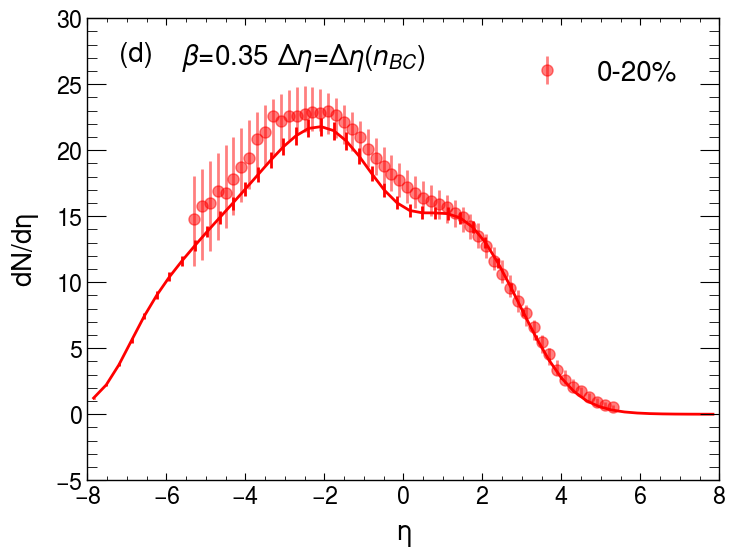

In [69]:
plot_hydro_all_mark(
    para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35",
    mode='MC',HWF_or_DWF='DWF',event_range=[0,1000],nsampling=4000,plot_errbar=True,label_para=["(d)\n",'0.35','$ \Delta \eta(n_{BC})$'],
    eta_flat='1p3',eta_gw='1p3',coef=1.0,fontsize=20,save_fig=False)

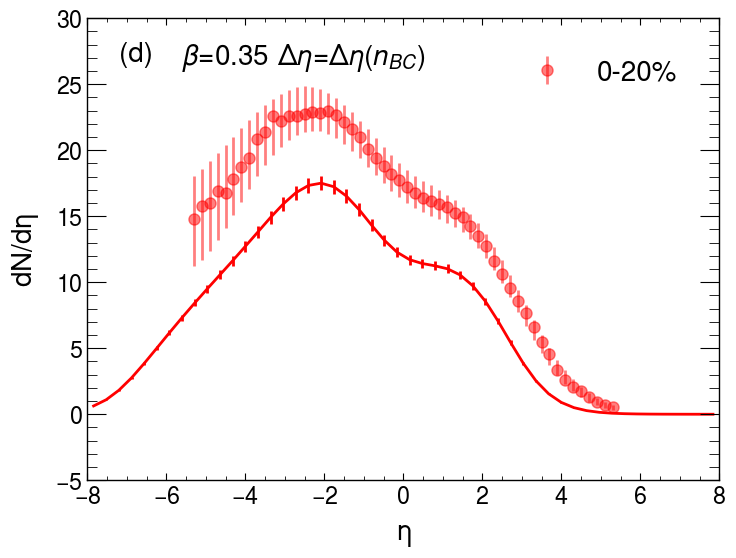

In [70]:
plot_hydro_all_mark(
    para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35",
    mode='MC2',HWF_or_DWF='DWF',event_range=[0,1000],nsampling=4000,plot_errbar=True,label_para=["(d)\n",'0.35','$ \Delta \eta(n_{BC})$'],
    eta_flat='1p3',eta_gw='1p3',coef=1.0,fontsize=20,save_fig=False)

无法处理文件 /media/mengzhu/disk2T/d_Au_work/d_Au_DWF/d_Au_work_pT_spectra/hydro_result_n_BC/Tfrz_128Mev_ETAOS_0p16_tau0p6/ebe_mc_nsampling_4000/plat_1p3_gw_1p3/entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35/dAu200/0_20/event0/dNdEta_mc_charged.dat: /media/mengzhu/disk2T/d_Au_work/d_Au_DWF/d_Au_work_pT_spectra/hydro_result_n_BC/Tfrz_128Mev_ETAOS_0p16_tau0p6/ebe_mc_nsampling_4000/plat_1p3_gw_1p3/entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35/dAu200/0_20/event0/dNdEta_mc_charged.dat not found.
无法处理文件 /media/mengzhu/disk2T/d_Au_work/d_Au_DWF/d_Au_work_pT_spectra/hydro_result_n_BC/Tfrz_128Mev_ETAOS_0p16_tau0p6/ebe_mc_nsampling_4000/plat_1p3_gw_1p3/entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35/dAu200/0_20/event1/dNdEta_mc_charged.dat: /media/mengzhu/disk2T/d_Au_work/d_Au_DWF/d_Au_work_pT_spectra/hydro_result_n_BC/Tfrz_128Mev_ETAOS_0p16_tau0p6/ebe_mc_nsampling_4000/plat_1p3_gw_1p3/

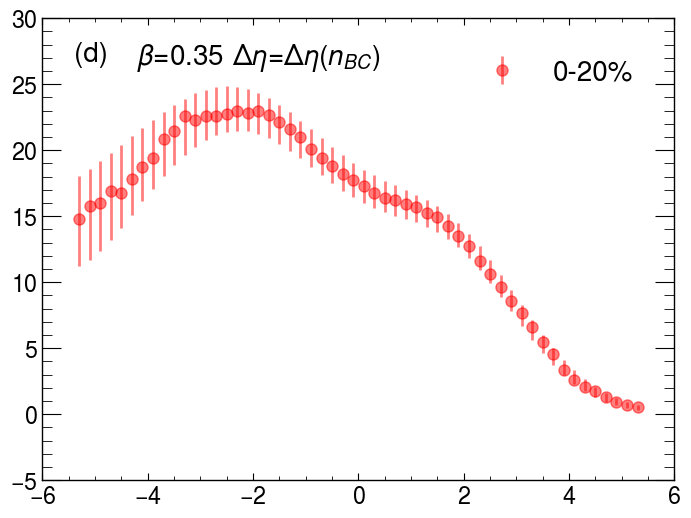

In [71]:
plot_hydro_all_mark(
    para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35",
    mode='MC3',HWF_or_DWF='DWF',event_range=[0,100],nsampling=4000,plot_errbar=True,label_para=["(d)\n",'0.35','$ \Delta \eta(n_{BC})$'],
    eta_flat='1p3',eta_gw='1p3',coef=1.0,fontsize=20,save_fig=False)